# Problema

Predecir el coste del seguro

# El set de datos

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance



In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
ruta = "/gdrive/MyDrive/EDEM/MachineLearning/Regression/insurance.csv"
data = pd.read_csv(ruta)

In [3]:
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Objetivo

Generar un model de regresión capaz de predecir el valor del seguro en base a las características del cliente.

* Aplicar las técnicas oportunas de procesamiento de datos

* Valorar diferentes modelos de regresión

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

## Implementación

Primero se comprobará en qué estado se encuentra el dataset antes del preprocesado de los datos. De esta forma, veremos si existen faltantes, o valores atípicos en él.

In [4]:
## A completar
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
for columna in data.columns:
  valores_unicos = set(data[columna])
  print(f"Valores únicos en la columna '{columna}': {valores_unicos}")


Valores únicos en la columna 'age': {18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64}
Valores únicos en la columna 'sex': {'male', 'female'}
Valores únicos en la columna 'bmi': {15.96, 16.815, 17.385, 17.765, 19.95, 20.425, 20.8, 22.705, 23.845, 24.6, 25.74, 26.315, 26.6, 27.72, 29.45, 27.36, 27.4, 32.11, 31.825, 28.025, 33.66, 28.6, 28.31, 30.78, 33.77, 33.0, 33.44, 34.4, 35.3, 36.005, 39.82, 40.3, 42.13, 39.9, 41.23, 49.06, 48.07, 45.54, 47.52, 46.75, 46.53, 47.41, 50.38, 52.58, 53.13, 18.905, 18.5, 19.0, 19.095, 21.78, 21.47, 21.375, 21.5, 21.28, 22.22, 22.0, 23.75, 23.655, 23.0, 24.75, 24.53, 24.97, 25.0, 26.22, 26.03, 26.125, 27.5, 27.0, 27.28, 28.0, 28.5, 28.595, 28.405, 29.0, 29.5, 30.875, 30.5, 30.03, 30.0, 30.25, 31.0, 31.5, 30.97, 32.965, 32.56, 32.78, 32.34, 32.5, 33.155, 33.345, 33.25, 33.5, 33.06, 34.5, 33.535, 35.625, 35.53, 35.09, 35.

Como se puede observar, tras la comprobación, el dataset se encuentra limpio de faltantes. Además, tras la realización de los valores únicos por cada una de las columnas del dataset, no existen valores anormales o que no concuerden con la distribución seguida.

A continuación se va a separar entre variables numéricas y categóricas para que podamos realizar adecuadamente el label encoder en las variables categóricas.

In [6]:
from sklearn.preprocessing import LabelEncoder

num_cols = data.select_dtypes(include=['int64', 'float64'])
cat_cols = data.select_dtypes(include=['object'])

le = LabelEncoder()

for columna in cat_cols.columns:
    if cat_cols[columna].dtype == 'object':
        cat_cols[columna] = le.fit_transform(cat_cols[columna])
cat_cols.head()

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1


In [7]:
df_encoded = df_encoded = pd.concat([num_cols, cat_cols], axis=1)

column_order = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

df_encoded = df_encoded[column_order]

df_encoded

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


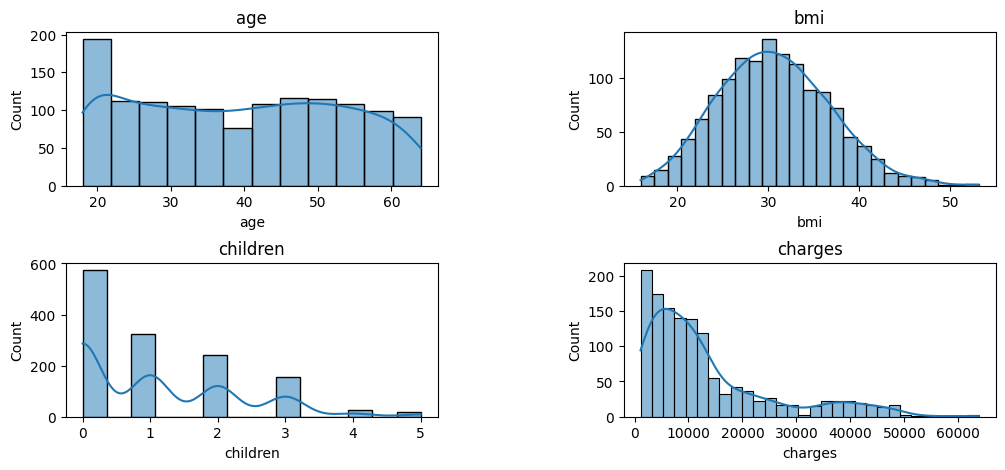

In [8]:
import pandas as pd


numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Configura el tamaño y la disposición de los subplots
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Crea un histograma para cada variable numérica
for i, column in enumerate(numeric_data.columns):
    plt.subplot(3, 2, i+1)  # Ajusta según el número de variables numéricas
    sns.histplot(data[column], kde=True)
    plt.title(column)

plt.show()


A continuación se normalizará el conjunto de datos para que pueda introducirse en el split de datos correctamente y tenga una buena predicción. Para ello, aplicaremos el MinMaxScaler ya que los datos, en su gran mayoría, no siguen distribuciones normales, como se puede observar en los histogramas anteriores.

In [9]:
X = df_encoded.drop('charges', axis = 1)
y = df_encoded['charges']

X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
print(X_norm)

[[0.02173913 0.         0.3212268  0.         1.         1.        ]
 [0.         1.         0.47914985 0.2        0.         0.66666667]
 [0.2173913  1.         0.45843422 0.6        0.         0.66666667]
 ...
 [0.         0.         0.56201238 0.         0.         0.66666667]
 [0.06521739 0.         0.26472962 0.         0.         1.        ]
 [0.93478261 0.         0.35270379 0.         1.         0.33333333]]


Una vez ya se tiene el dataset normalizado con el MinMaxScaler, lo que se va a realizar es la separación en conjuntos de datos para poder introducirlos en los modelos a realizar.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state = 42)

## MODELOS

Con el conjunto de datos ya preparado, se va a comenzar con la prueba de distintos modelos de regresión para ver cuál es aquel que mejor conviene para la predicción del coste del seguro

### REGRESIÓN LINEAL

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Crear una instancia del modelo de regresión lineal
linear_regression = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
linear_regression.fit(X_train, y_train)

# Predecir los valores para los datos de prueba
y_pred = linear_regression.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)


Error cuadrático medio: 35174149.32705305


In [13]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2):", r2)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio (MAE):", mae)


Coeficiente de determinación (R^2): 0.766890558346091
Error absoluto medio (MAE): 4252.856455792361


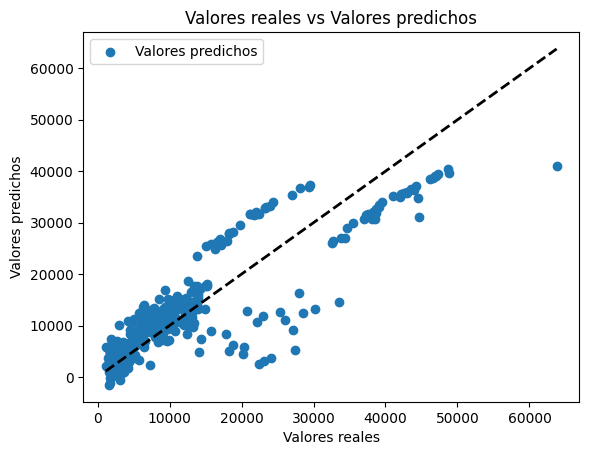

In [14]:
# Graficar los valores reales y los valores predichos
plt.scatter(y_test, y_pred, label='Valores predichos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs Valores predichos')
plt.legend()
plt.show()


### RIDGE

In [15]:
from sklearn.linear_model import Ridge

# Crear una instancia del modelo de regresión Ridge
ridge_regression = Ridge()

# Ajustar el modelo a los datos de entrenamiento
ridge_regression.fit(X_train, y_train)

# Predecir los valores para los datos de prueba
y_pred_ridge = ridge_regression.predict(X_test)


In [16]:
# Métrica para Regresión Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Error cuadrático medio (Ridge Regression):", mse_ridge)

Error cuadrático medio (Ridge Regression): 35196764.05278522


Text(0.5, 1.0, 'Valores reales vs Valores predichos (Ridge)')

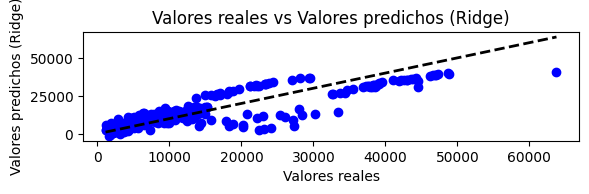

In [17]:
# Crear subgráfico para los resultados de Regresión Ridge
plt.subplot(3, 1, 1)
plt.scatter(y_test, y_pred_ridge, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos (Ridge)')
plt.title('Valores reales vs Valores predichos (Ridge)')

### LASSO

In [18]:
from sklearn.linear_model import Lasso

# Crear una instancia del modelo de regresión Lasso
lasso_regression = Lasso()

# Ajustar el modelo a los datos de entrenamiento
lasso_regression.fit(X_train, y_train)

# Predecir los valores para los datos de prueba
y_pred_lasso = lasso_regression.predict(X_test)

In [19]:
# Métrica para Regresión Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Error cuadrático medio (Lasso Regression):", mse_lasso)

Error cuadrático medio (Lasso Regression): 35175090.2986566


Text(0.5, 1.0, 'Valores reales vs Valores predichos (Lasso)')

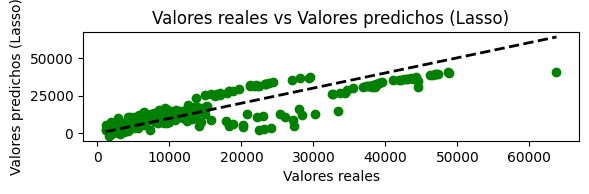

In [20]:
# Crear subgráfico para los resultados de Regresión Lasso
plt.subplot(3, 1, 2)
plt.scatter(y_test, y_pred_lasso, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos (Lasso)')
plt.title('Valores reales vs Valores predichos (Lasso)')

### ARBOLES DE DECISIÓN

In [21]:
from sklearn.tree import DecisionTreeRegressor

# Crear una instancia del modelo de regresión de árboles de decisión
decision_tree_regression = DecisionTreeRegressor()

# Ajustar el modelo a los datos de entrenamiento
decision_tree_regression.fit(X_train, y_train)

# Predecir los valores para los datos de prueba
y_pred_decision_tree = decision_tree_regression.predict(X_test)

mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
print("Error cuadrático medio (Decision Tree Regression):", mse_decision_tree)

r2_decision_tree = r2_score(y_test, y_pred_decision_tree)
print("Coeficiente de determinación (R^2) para Regresión de Árboles de Decisión:", r2_decision_tree)

Error cuadrático medio (Decision Tree Regression): 39966516.754021004
Coeficiente de determinación (R^2) para Regresión de Árboles de Decisión: 0.735130128698922


Text(0.5, 1.0, 'Valores reales vs Valores predichos (Decision Tree)')

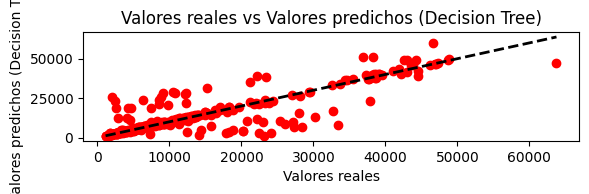

In [22]:
plt.subplot(3, 1, 3)
plt.scatter(y_test, y_pred_decision_tree, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos (Decision Tree)')
plt.title('Valores reales vs Valores predichos (Decision Tree)')

### Support Vector Machine Regressor

Métricas de rendimiento:
  MSE en entrenamiento: 157755716.77
  MSE en prueba: 163543339.18
  MAE en entrenamiento: 8231.91
  MAE en prueba: 8441.91
  R^2 en entrenamiento: -0.09
  R^2 en prueba: -0.08


<ipython-input-23-9d71e1199de0>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Recta Ideal')


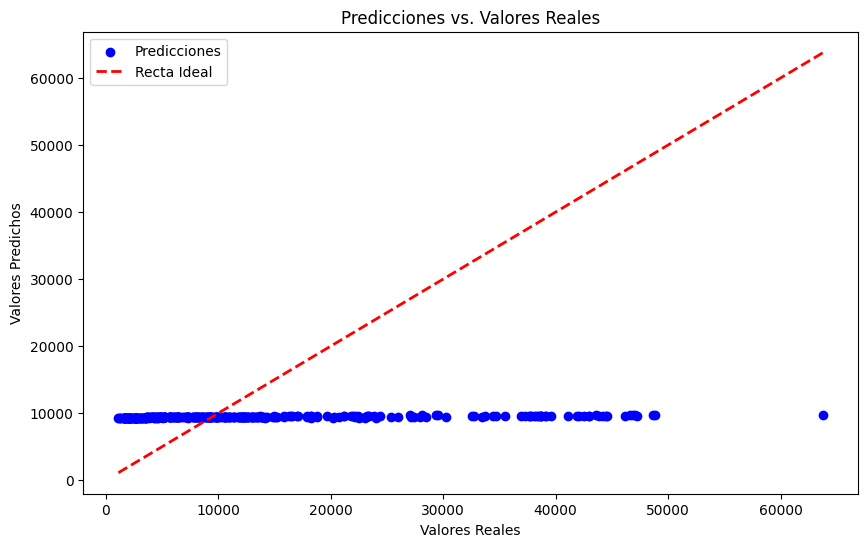

In [23]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# SVM de regresión
svm_regressor = SVR(kernel='linear')

svm_regressor.fit(X_train, y_train)

# Predecir en los conjuntos de entrenamiento y prueba
y_train_pred = svm_regressor.predict(X_train)
y_test_pred = svm_regressor.predict(X_test)

# Calcular métricas de evaluación
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Métricas de rendimiento:")
print(f"  MSE en entrenamiento: {mse_train:.2f}")
print(f"  MSE en prueba: {mse_test:.2f}")
print(f"  MAE en entrenamiento: {mae_train:.2f}")
print(f"  MAE en prueba: {mae_test:.2f}")
print(f"  R^2 en entrenamiento: {r2_train:.2f}")
print(f"  R^2 en prueba: {r2_test:.2f}")

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Recta Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Predicciones vs. Valores Reales')
plt.legend()
plt.show()


Como los resultados del SVR no han salido bien, ya que las métricas MSE y R^2 son bajos, mientras que el MAE es bastante alto, a continuación, se va a realizar un **GRID SEARCH** para encontrar los mejores parámetros y ver si el modelo actual mejora.

### GRID SEARCH

In [25]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a probar
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Crear el modelo SVM de regresión
svm_regressor = SVR()

# Configurar la búsqueda de cuadrícula con validación cruzada de 5 veces
grid_search = GridSearchCV(svm_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Realizar la búsqueda de cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:", best_params)

# Entrenar el modelo con los mejores parámetros
best_svm_regressor = grid_search.best_estimator_
best_svm_regressor.fit(X_train, y_train)

# Predecir en los conjuntos de entrenamiento y prueba con el mejor modelo
y_train_pred = best_svm_regressor.predict(X_train)
y_test_pred = best_svm_regressor.predict(X_test)

# Calcular métricas de evaluación con el mejor modelo
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nMétricas de rendimiento con los mejores parámetros:")
print(f"  MSE en entrenamiento: {mse_train:.2f}")
print(f"  MSE en prueba: {mse_test:.2f}")
print(f"  MAE en entrenamiento: {mae_train:.2f}")
print(f"  MAE en prueba: {mae_test:.2f}")
print(f"  R^2 en entrenamiento: {r2_train:.2f}")
print(f"  R^2 en prueba: {r2_test:.2f}")



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros encontrados: {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}

Métricas de rendimiento con los mejores parámetros:
  MSE en entrenamiento: 30047147.29
  MSE en prueba: 28382355.70
  MAE en entrenamiento: 2743.02
  MAE en prueba: 2804.52
  R^2 en entrenamiento: 0.79
  R^2 en prueba: 0.81


<ipython-input-26-a5749e14fe70>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Recta Ideal')


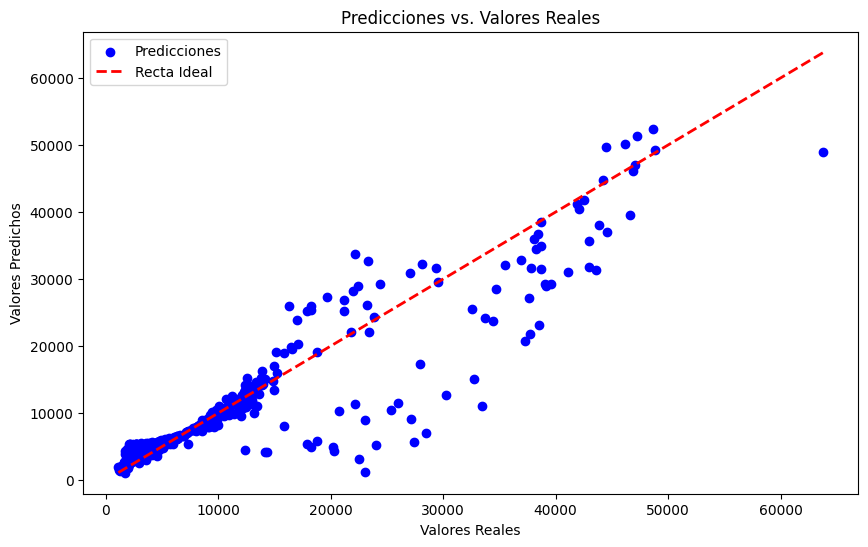

In [26]:
# Graficar resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Recta Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Predicciones vs. Valores Reales')
plt.legend()
plt.show()

Una vez realizado el GridSearch para conocer los parámetros ideales, después de haber entrenado 120 modelos con sus distintas configuraciones, destacar que los resultados del mejor modelo, han mejorado a su predecesor. Siendo los mejores parámetros: {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}.

Con ello, tanto el MAE como el MSE se vieron reducidos. por otra parte, el R^2 ha aumentado significativamente.

### XGBOOST

En el siguiente fragmento de código, se va a probar un modelo XGBOOST. Para ello, lo primero que se realiza, es la instalación de la librería.

In [28]:
pip install xgboost

Métricas de rendimiento:
  MSE en entrenamiento: 4991382.16
  MSE en prueba: 23422972.02
  MAE en entrenamiento: 1284.80
  MAE en prueba: 2687.21
  R^2 en entrenamiento: 0.97
  R^2 en prueba: 0.84


<ipython-input-30-33c7569727a4>:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Recta Ideal')


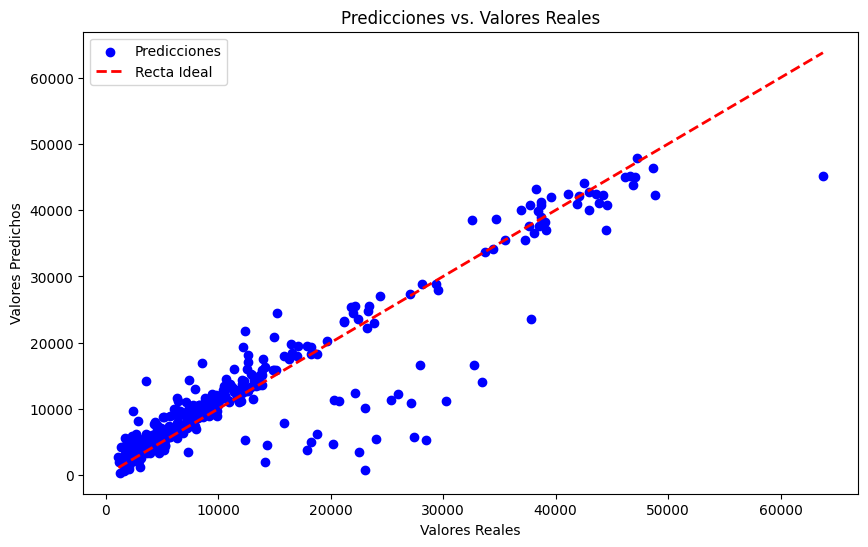

In [30]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Convertir los datos a formato DMatrix de XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Especificar los parámetros del modelo
params = {
    'objective': 'reg:squarederror',  # regresión
    'eval_metric': 'rmse',  # métrica de evaluación: error cuadrático medio
    'eta': 0.1,  # tasa de aprendizaje
    'max_depth': 6,  # profundidad máxima del árbol
    'subsample': 0.8,  # proporción de muestras utilizadas para entrenar cada árbol
    'colsample_bytree': 0.8  # proporción de características utilizadas para entrenar cada árbol
}

# Entrenar el modelo
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)

# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = bst.predict(dtrain)
y_test_pred = bst.predict(dtest)

# Calcular métricas de evaluación
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Métricas de rendimiento:")
print(f"  MSE en entrenamiento: {mse_train:.2f}")
print(f"  MSE en prueba: {mse_test:.2f}")
print(f"  MAE en entrenamiento: {mae_train:.2f}")
print(f"  MAE en prueba: {mae_test:.2f}")
print(f"  R^2 en entrenamiento: {r2_train:.2f}")
print(f"  R^2 en prueba: {r2_test:.2f}")

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Recta Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Predicciones vs. Valores Reales')
plt.legend()
plt.show()


Aparentemente, a primera vista, parece que el modelo XGBOOST, tiene un buen rendimiento siendo bajos los MAE y MSE y alto el R^2 tanto en el set de entrenamiento, así como en el de test.

### ENSEMBLE: Random Forest, Gradient Boosting Regressor, AdaBoosting Regressor, Stacking Regressor, Linear Regressor.

Métricas de rendimiento:
  MSE en entrenamiento: 14504693.67
  MSE en prueba: 21491724.09
  MAE en entrenamiento: 1978.65
  MAE en prueba: 2481.37
  R^2 en entrenamiento: 0.90
  R^2 en prueba: 0.86


<ipython-input-31-e95e9d59418d>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Recta Ideal')


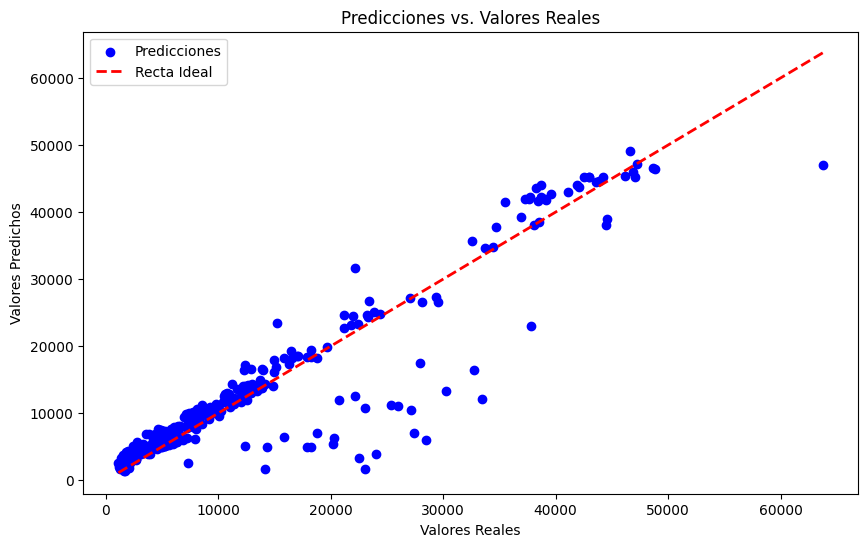

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Definir modelos base
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)

# Definir meta-modelo
meta_model = LinearRegression()

# Crear el ensamblaje
ensemble = StackingRegressor(
    estimators=[('rf', rf_model), ('gb', gb_model), ('ab', ab_model)],
    final_estimator=meta_model
)

# Entrenar el ensamblaje
ensemble.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = ensemble.predict(X_train)
y_test_pred = ensemble.predict(X_test)

# Calcular métricas de evaluación
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Métricas de rendimiento:")
print(f"  MSE en entrenamiento: {mse_train:.2f}")
print(f"  MSE en prueba: {mse_test:.2f}")
print(f"  MAE en entrenamiento: {mae_train:.2f}")
print(f"  MAE en prueba: {mae_test:.2f}")
print(f"  R^2 en entrenamiento: {r2_train:.2f}")
print(f"  R^2 en prueba: {r2_test:.2f}")

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Recta Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Predicciones vs. Valores Reales')
plt.legend()
plt.show()


Ensamblaje de modelos que combina las predicciones de Random Forest, Gradient Boosting y AdaBoost utilizando un meta-modelo de regresión lineal.

Estas métricas indican que el ensamblaje de modelos tiene un buen desempeño en general:

El MSE en el conjunto de entrenamiento y prueba es relativamente bajo, el MAE en ambos conjuntos también es bajo y, por último el coeficiente de determinación (R^2) es alto tanto en el conjunto de entrenamiento como en el de prueba, lo que indica que el ensamblaje explica una gran parte de la variabilidad en los datos. Esto sugiere que el modelo es capaz de generalizar bien a datos no vistos.

# Conclusiones

En el proyecto propuesto se ha trabajado en un problema de regresión donde lo que queríamos predecir era el coste del seguro para las personas según las características que estos tenían. Para ello, los pasos a realizar han sido los siguientes:

- Preprocesado de los datos: Aquí lo que se ha realizado es la comprobación del dataset para conocer si existen valores faltantes, atípicos o las distribuciones que siguen las distintas variables del dataset. A las variables categóricas se les ha aplicado la codificación LabelEncoder. Además se ha normalizado el dataset.

- Se han realizado distintos modelajes para comprobar cuál era aquel que se acercaba más a la realidad, es decir, el que mejor predecía los resultados. Para ello se han usado Regresión Lineal, Ridge, Lasso, Árboles de decisión, Support Vector Machine Regressor (Este ultimo no funcionó bien) por ello se realizó un Grid Search, para buscar los mejores parámetros y mejorar el modelo anterior. Además, otros modelos como XGBOOST y Ensembles.

- Métricas:
  - Utilizamos métricas estándar de regresión, como el error cuadrático medio (MSE), el error absoluto medio (MAE) y el coeficiente de determinación (R^2), para evaluar el rendimiento de los modelos.
  - Todos los modelos presentaron un alto R^2 tanto en el conjunto de entrenamiento como en el de prueba, indicando una capacidad excepcional para generalizar a datos no vistos.

En general, los modelos seleccionados demostraron ser efectivos para este problema de regresión, con capacidades de generalización sólidas y un buen equilibrio entre sesgo y varianza.

El XGBoost y el ensamblaje de modelos destacaron como las mejores opciones, ofreciendo un rendimiento excepcional en la tarea de predicción.